In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle as p
cv2.__version__

'3.4.5'

In [6]:
#paths 

folder = './models'
model_path = os.path.join(folder,'ssd.caffemodel')
proto_path = os.path.join(folder,'deploy.prototxt')
model_path,proto_path

('./models\\ssd.caffemodel', './models\\deploy.prototxt')

## Dnet is used to Detect The Face (Draw the bouding box)
## Enet is used to encode the face into 128X1 Vector

In [7]:
dnet = cv2.dnn.readNetFromCaffe(proto_path,model_path)
#face net model
enet = cv2.dnn.readNetFromTorch('./models/openface_nn4.small2.v1.t7')

# Visualizing How Different Functions Work

In [8]:
img = cv2.imread('./people/unknown/image100.jpg')
print(img.shape)
blob_img = cv2.dnn.blobFromImage(img,1.0,size = (300,300),mean = (123.68,116.78,103.94),swapRB = False,crop = False)
blob_img.shape

h,w,_ = img.shape


(750, 562, 3)


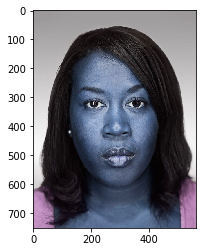

In [9]:
plt.imshow(img)

# Output of  *blobFromImage* function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 3, 300, 300)


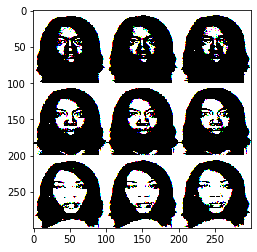

In [10]:
print(blob_img.shape)
plt.imshow(blob_img.reshape(300,300,3))

# Output of the Face Detection Neural Network

In [11]:
dnet.setInput(blob_img)
result = dnet.forward()

In [15]:
result[0][0].shape

(130, 7)

# Drawing the bounding box (without filtering)

In [17]:
for finalr  in result[0][0]:

    

    box = finalr[3:] * np.array([w,h,w,h])
    (x1,y1,x2,y2) = box.astype('int32')


#     print(x1,y1,x2,y2)

    cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),2)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Helper Functions Claculating -

<pre>
IOU (intersection over union)
NMS (non - max supression)
</pre>

In [18]:

def iou(bbox1,bbox2):
    #content of box : x,y,width,height
    #formula  intersection/union
    
    
    x1,y1,w1,h1 = bbox1
    x2,y2,w2,h2 = bbox2
    
#     print(x1,y1,w1,h1)
  
    
    x3 = np.max((x1,x2))
    y3 = np.max((y1,y2))
    w3 = np.min((x1+w1,x2+w2)) - x3
    h3 = np.min((y1+h1,y2+h2)) - y3
    
    #print('w3',w3)
    #print('h3',h3)
    
    if w3<=0 or h3 <=0:
        return 0
    
    iint = w3*h3
    #print(iint)
    u = (w1*h1 + w2*h2) - iint
    #print("area1",w1*h1)
    #print("area2",w2*h2)
    
    return iint/u
 
# print(iou2(box[0],box[1]))
# box

def nms(box,th = 0.1):   
    
    for p in range(len(box)):
        
        box1 = box[p]
    
        if p == len(box) -1:
#             print('stopping')
            break
    
        for j in range(1,len(box)):
        
            box2 = box[j]
            result = iou(box1,box2)
#             print('iou',result)
            if result > th:
                box[j] = np.array([0,0,0,0])
#                 print(j)
    return box


# Filtering Bounding boxes with respect to score first then using NmS if needed

In [19]:

def filter_op(r,conf = 0.9):
    
    
    box = []
    
    #filtering out using confidence levels
    for i in r[0,0,:]:

        if i[2] > conf:
            b = i[3:] * np.array([w,h,w,h])
            box.append(b.astype('int32'))
        
    return box    
        


    



In [20]:
def process(res,conf = 0.9,th = 0.1):
    
    
    rect = filter_op(res,conf)
    print(len(rect))
    if len(rect)>1:
        print('perfroming nms')
        n_rect = nms(rect,th)
        return [x for x in n_rect if x.all() != 0]

    return rect

# Drawing Bounding Box again with filtering

2
perfroming nms
[array([127, 146, 434, 610])] 1


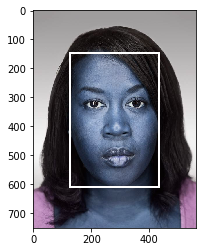

In [24]:
op = process(result,conf = 0.77)
print(op,len(op))

img = cv2.imread('./people/unknown/image100.jpg')

for o in op:
    cv2.rectangle(img,(o[0],o[1]),(o[2],o[3]),(255,255,255),5)
    
plt.imshow(img)

In [10]:
# face net model
# enet = cv2.dnn.readNetFromTorch('./models/openface_nn4.small2.v1.t7')

# Extracting the face now 

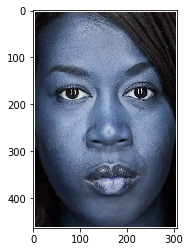

In [25]:
face = img[op[0][1]:op[0][3],op[0][0]:op[0][2]]
# print(face.shape)
face_blob = cv2.dnn.blobFromImage(face,1/255,(96,96),swapRB = True)
# print(face_blob.shape)
plt.imshow(face)

# Using Enet to encode the face into a Vector


In [26]:
enet.setInput(face_blob)
fresult = enet.forward()

In [27]:
fresult

array([[ 1.20225914e-01,  3.27130593e-02,  1.01759367e-01,
         1.38021111e-01, -3.09301447e-02,  2.22438380e-01,
         7.65682533e-02, -1.95972472e-02, -6.13568630e-03,
         3.29017732e-03, -1.47327762e-02, -6.54159999e-03,
         1.35041788e-04, -1.35637030e-01,  1.45924523e-01,
         2.53567677e-02,  2.13409420e-02,  5.95422275e-02,
        -4.74710576e-02, -5.40668890e-02,  2.77007744e-02,
         5.74315973e-02,  4.83198985e-02,  1.48352981e-01,
        -5.93372388e-03, -1.29834056e-01, -1.19457446e-01,
        -2.02260986e-01, -1.09109864e-01,  2.78721042e-02,
         7.01647103e-02,  1.25372127e-01, -6.54296204e-02,
         1.47834912e-01,  7.73920566e-02, -1.70676187e-02,
         1.60554245e-01, -5.67541970e-03, -5.58521692e-03,
        -8.48845055e-04,  3.92302424e-02, -7.88743049e-02,
         2.31246054e-02, -1.33870631e-01, -3.81545462e-02,
        -8.88215527e-02,  6.62628040e-02, -3.22040915e-02,
        -4.74585481e-02,  1.03427947e-01,  2.17637539e-0

# Helper Function that returns the embegings

In [7]:
def get_embedding(img,r):
    
    face = img[r[1]:r[3],r[0]:r[2]]
    
    if face.shape[0] == 0 or face.shape[1] == 0:
        print('shape is 0')
        return np.zeros(128).reshape(1,128)
    
#     print(face.shape)
    face_blob = cv2.dnn.blobFromImage(face,1.0/255,(96,96),(0, 0, 0),swapRB = True,crop = False)
#     print(face_blob.shape)
    enet.setInput(face_blob)
    return enet.forward()
    
    

# CREATING A Quick FACE DETECTION PIPELINE For  Collecting Training Phase 
## The below cell captures  num images of a person but its seen that the accuracy of the model decreases if different images of the face (different lighting,angles ) are not present.

In [20]:
#gettiing training images
cam = cv2.VideoCapture(0)
i = 1
num = 20
name = input('enter name')
while i<=num :


    
    _,frame = cam.read()
    
    if not os.path.exists('./people/'+name):
        os.mkdir('./people/'+name)
        print('folder created')
        
        
    
    img_path = './people/'+name+'/'+name+'_{}'.format(i)+'.jpg'
    cv2.imshow('img',cv2.flip(frame,1))
    
    if cv2.waitKey(1) & 0xFF == ord('c'):
        cv2.imwrite(img_path,frame)    
        print('image {}/{} saved'.format(i,20))
        i = i + 1
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
cam.release()    
cv2.destroyAllWindows()   
        
    
    



enter nameclive
image 1/20 saved
image 2/20 saved
image 3/20 saved
image 4/20 saved
image 5/20 saved
image 6/20 saved
image 7/20 saved
image 8/20 saved
image 9/20 saved
image 10/20 saved
image 11/20 saved
image 12/20 saved
image 13/20 saved
image 14/20 saved
image 15/20 saved
image 16/20 saved
image 17/20 saved
image 18/20 saved
image 19/20 saved
image 20/20 saved


# Detecting  and Encoding Faces from the *people* folder using model ssd_model

clive
./people/clive/clive_10.jpg
no of detections: 120


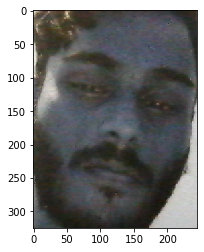

./people/clive/clive_12.jpg
no of detections: 117


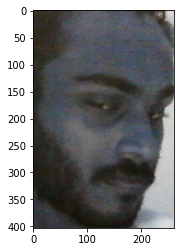

./people/clive/clive_13.jpg
no of detections: 124


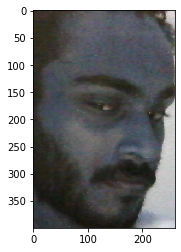

./people/clive/clive_18.jpg
no of detections: 123


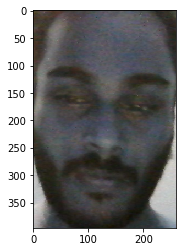

./people/clive/clive_19.jpg
no of detections: 123


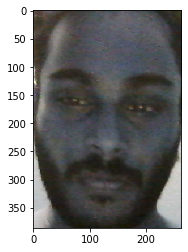

./people/clive/clive_20.jpg
no of detections: 121


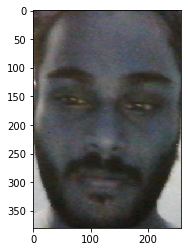

./people/clive/clive_3.jpg
no of detections: 118


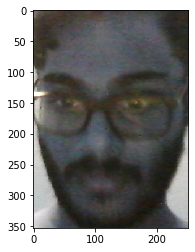

./people/clive/clive_6.jpg
no of detections: 113


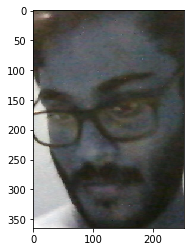

./people/clive/clive_7.jpg
no of detections: 122


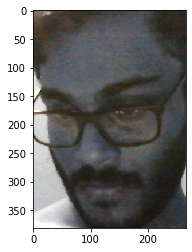

./people/clive/clive_8.jpg
no of detections: 124


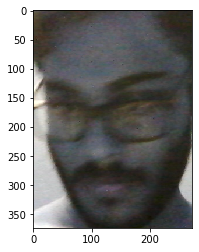

./people/clive/clive_9.jpg
no of detections: 125


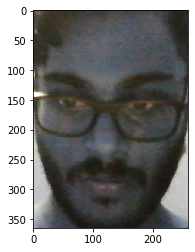

./people/clive/IMG-2216.JPG
no of detections: 112


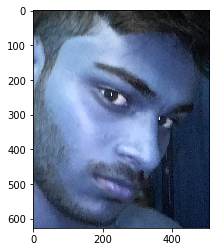

./people/clive/IMG-3653.jpg
no of detections: 117


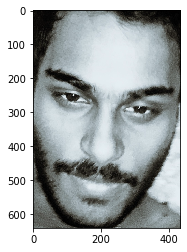

./people/clive/IMG-4153.JPG
no of detections: 133


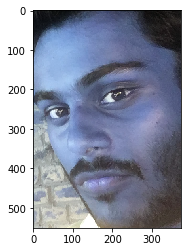

./people/clive/IMG-4589.jpg
no of detections: 111


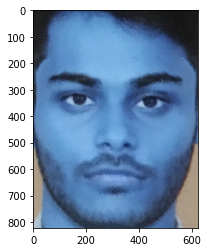

./people/clive/IMG-4641.JPG
no of detections: 156


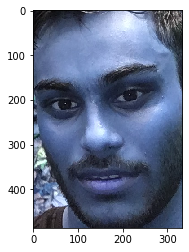

./people/clive/IMG-5007.jpg
no of detections: 130


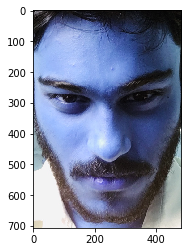

./people/clive/IMG-5322.jpg
no of detections: 129


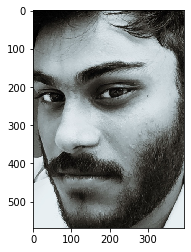

./people/clive/IMG-5323.jpg
no of detections: 134


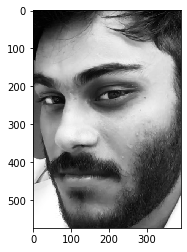

elon_musk
./people/elon_musk/download.jpg
no of detections: 108


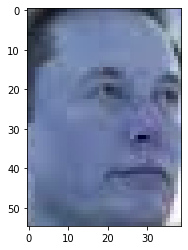

./people/elon_musk/em_10.jfif
no of detections: 100


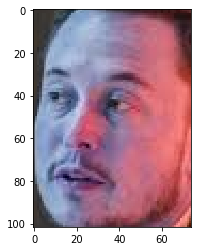

./people/elon_musk/em_2.jfif
no of detections: 127


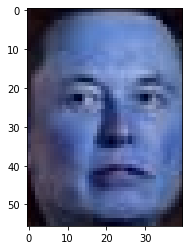

./people/elon_musk/em_3.jfif
no of detections: 110


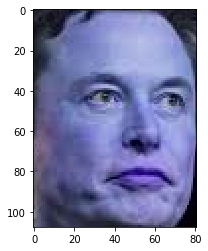

./people/elon_musk/em_4.jfif
no of detections: 84


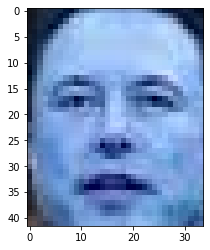

./people/elon_musk/em_5.jfif
no of detections: 125


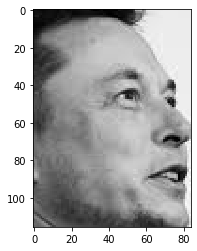

./people/elon_musk/em_6.jpeg
no of detections: 77


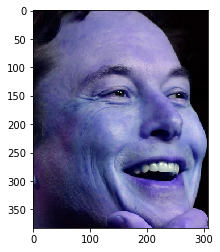

./people/elon_musk/em_7.jfif
no of detections: 130


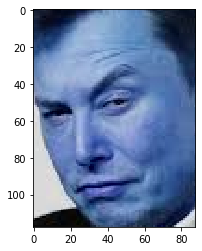

./people/elon_musk/em_8.jfif
no of detections: 104


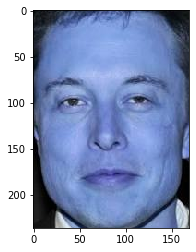

./people/elon_musk/em_9.jfif
no of detections: 69


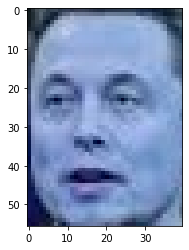

unknown
./people/unknown/image100.jpg
no of detections: 147


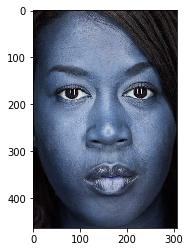

./people/unknown/image101.jpg
no of detections: 125


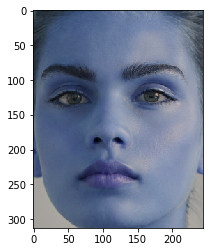

./people/unknown/image103.jpg
no of detections: 126


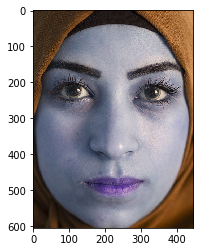

./people/unknown/image113.jpg
no of detections: 145


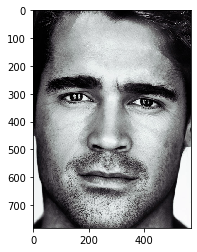

./people/unknown/image122.jpg
no of detections: 114


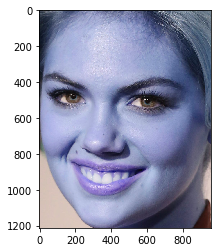

./people/unknown/image133.jpg
no of detections: 94


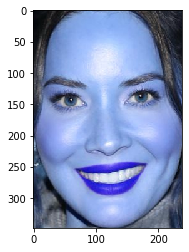

./people/unknown/image135.jpg
no of detections: 108


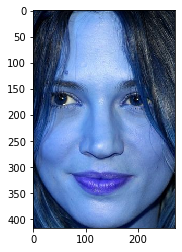

./people/unknown/image136.jpg
no of detections: 117


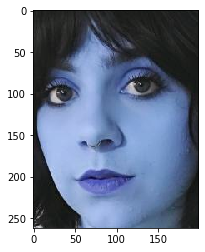

./people/unknown/image168.jpg
no of detections: 127


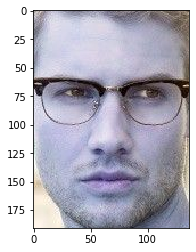

./people/unknown/image183.jpg
no of detections: 91


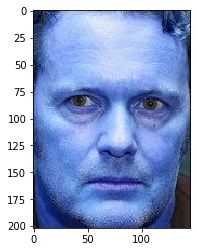

./people/unknown/image188.jpg
no of detections: 159


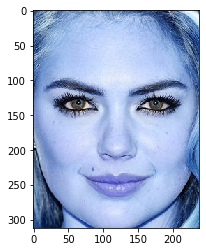

./people/unknown/image190.jpg
no of detections: 144


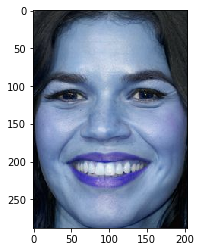

./people/unknown/image237.jpg
no of detections: 147


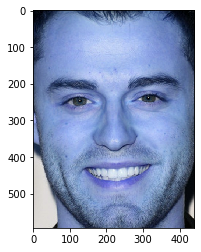

./people/unknown/image245.jpg
no of detections: 107


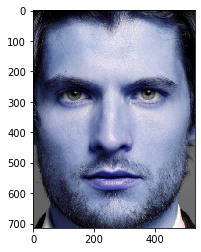

./people/unknown/image280.jpg
no of detections: 112


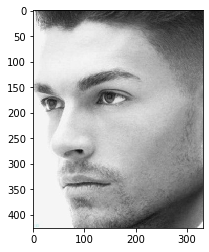

./people/unknown/image294.jpg
no of detections: 128


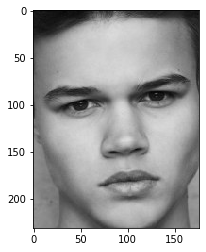

./people/unknown/image297.jpg
no of detections: 140


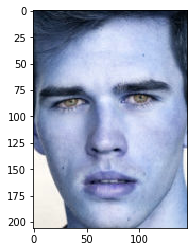

./people/unknown/image300.jpg
no of detections: 116


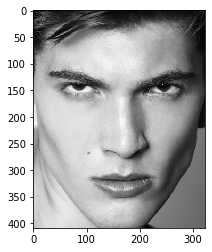

no of embeddigs and names 47 47


In [8]:
emb = []
name = []
for path in os.listdir('./people'):
    
    print(path)
    for img in os.listdir('./people/'+path):
        
        
        img_path = './people/'+path+'/'+img
        print(img_path)
        i = cv2.imread(img_path)
        
        
        blob_img = cv2.dnn.blobFromImage(i,1.0,size = (300,300),mean = (104.0, 177.0, 123.0),swapRB = False,crop = False)
        h,w,_ = i.shape
        dnet.setInput(blob_img)
        result = dnet.forward()
#         print(result.shape)
        res = process(result,conf = 0)
        print('no of detections:',len(res))
        plt.figure()
        plt.imshow(i[res[0][1]:res[0][3],res[0][0]:res[0][2]])
        plt.show()
        emb.append(get_embedding(i,res[0]))
        name.append(path)
        
        
print('no of embeddigs and names',len(emb),len(name))    
with open('./pickle_files/'+'emb.pickle','wb') as f:
    p.dump({'emb':emb,'name':name},f)
        
    

# Saving the embeddings into emb.pickle file

In [9]:
#loadding the pickle file 
with open('./pickle_files/emb.pickle','rb') as f:
    data = p.load(f)
    

print(data.keys())

print(len(data['emb']))
print(data['name'])
print(data['emb'][0].shape)
    

dict_keys(['emb', 'name'])
47
['clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'clive', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'elon_musk', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown']
(1, 128)


In [9]:
data['emb'][0][0][0:5]

array([-0.0928152 ,  0.10990693,  0.023908  ,  0.0782867 ,  0.09925489],
      dtype=float32)

# Encoding The labels

In [10]:
#encoding labels 

from sklearn.preprocessing import LabelEncoder


    
label  = LabelEncoder()
l = label.fit_transform(data['name'])
print(l)
label.inverse_transform([0])[0]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2]


'clive'

# Using a Simple Ml Model 



In [15]:
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
# x = np.array(np.squeeze(np.array(data['emb'])))
# print(x.shape)
# xtrain,xtest,ytrain,ytest = train_test_split(x,l,test_size = 0.1,shuffle = True)


# clf2 = SVC(C = 1.0, kernel = 'linear',probability = True)


clf2 = LogisticRegression(multi_class = "multinomial",max_iter = 700,solver = "lbfgs")


clf2.fit(np.squeeze(data['emb']),l)
print('score',clf2.score(np.squeeze(np.array(data['emb'])),l))

# print(label.inverse_transform(clf.predict(data['emb'][0]))[0])
# np.squeeze(np.array(data['emb'])).shape,l.shape

preds = clf2.predict_proba(data['emb'][0].reshape(1,-1))[0]
j = np.argmax(preds)
proba = preds[j]
name = label.classes_[j]

print(preds)
proba,name


score 0.8723404255319149
[0.79204498 0.04980296 0.15815206]


(0.7920449818610653, 'clive')

In [13]:
with open('classifier.pickle','wb') as f:
    
    p.dump(clf2,f)
 
with open('encoded_label.pickle','wb') as f:
    
    p.dump(label,f)
    

# Using a Deep Neural Network

In [11]:
from sklearn.model_selection import train_test_split
emb = np.asarray(data['emb'])
print(emb.shape)
from keras.utils import to_categorical
y_binary = to_categorical(l)
y_binary = y_binary.reshape(-1,1,3)
print(y_binary.shape)

xtrain,xtest,ytrain,ytest = train_test_split(emb,y_binary,test_size = 0.3,shuffle = True)


(47, 1, 128)


Using TensorFlow backend.


(47, 1, 3)


In [18]:
#creating a neural net model
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Dense(64,input_shape = (1,128),activation = "relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(3,activation = "softmax"))

model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 64)             8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1, 128)            8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1, 3)              387       
Total params: 16,963
Trainable params: 16,963
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.input_shape,model.output_shape

((None, 1, 128), (None, 1, 3))

In [80]:
hist= model.fit(xtrain,ytrain,epochs = 50,validation_data = (xtest,ytest),validation_steps= 30)

Train on 32 samples, validate on 15 samples
Epoch 1/50
32/32 [==============================] - 1s 34ms/sample - loss: 1.0929 - accuracy: 0.4062 - val_loss: 32.0277 - val_accuracy: 0.4000
Epoch 2/50
32/32 [==============================] - 0s 3ms/sample - loss: 1.0795 - accuracy: 0.4688 - val_loss: 31.6540 - val_accuracy: 0.4667
Epoch 3/50
32/32 [==============================] - 0s 3ms/sample - loss: 1.0670 - accuracy: 0.5312 - val_loss: 31.2922 - val_accuracy: 0.4667
Epoch 4/50
32/32 [==============================] - 0s 3ms/sample - loss: 1.0552 - accuracy: 0.5625 - val_loss: 30.9404 - val_accuracy: 0.5333
Epoch 5/50
32/32 [==============================] - 0s 3ms/sample - loss: 1.0439 - accuracy: 0.5625 - val_loss: 30.5881 - val_accuracy: 0.6000
Epoch 6/50
32/32 [==============================] - 0s 3ms/sample - loss: 1.0326 - accuracy: 0.5625 - val_loss: 30.2239 - val_accuracy: 0.6000
Epoch 7/50
32/32 [==============================] - 0s 3ms/sample - loss: 1.0211 - accuracy: 0.68

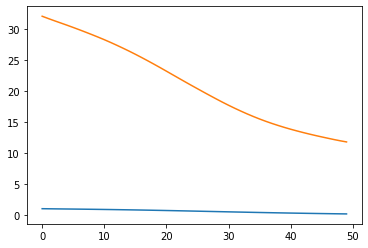

In [81]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Saving the model

In [18]:
tf.saved_model.save(model,"./tf_models/")



In [25]:
# model_inf = tf.saved_model.load("./tf_models/")

input = np.random.rand(1,1,128)

model = tf.keras.models.load_model("./tf_models/")
model.predict(input)

array([[[0.17193581, 0.2311742 , 0.59689   ]]], dtype=float32)

In [65]:
# def decode(emb):
# clf = p.load(open('classifier.pickle','rb'))
# label = p.load(open('encoded_label.pickle','rb'))


In [26]:
# cv2.dnn.readNetFromTensorflow("./tf_models/saved_model.pb")

# Testing using the DL Model

In [82]:
import cv2
#gettiing training images
cam = cv2.VideoCapture(0)
name = 'output'
names = []

import time

fps = 0
t1 = time.time()

while 1 :

    _,frame = cam.read()
    
    blob_img = cv2.dnn.blobFromImage(frame,1.0,size = (300,300),mean = (123.68,116.78,103.94),swapRB = False,crop = False)
    h,w,_ = frame.shape
    dnet.setInput(blob_img)
    result = dnet.forward()
#     print(result.shape)
    res = process(result,conf = 0.9)
#     print('no of detections:',len(res))
    
    if len(res) > 0:
            for i in range(len(res)):
                
                vec = get_embedding(frame,res[i])
                vec = vec.reshape(1,1,128)
                preds = model.predict(vec)[0][0]
#                 print(preds)
                #getting the name and the probability
                    
                index = np.argmax(preds)
                print(index)
                name = label.inverse_transform([index])[0]
                proba = preds[index]
                
                text = name + "%.2f"%proba
                
                
                if proba < 0.5:
                    color = (0,0,255)
                else:
                    color = (0,255,0)

                cv2.rectangle(frame,(res[i][0],res[i][1]),(res[i][2],res[i][3]),color,5)

                    
                cv2.putText(frame,text,(res[i][0]-20,res[i][1]-10),cv2.FONT_HERSHEY_SIMPLEX,1,color,3,cv2.LINE_AA)


                if len(res) == 2:

                    print(name,proba,i,preds)
#                 names.append(name)
                
#                 print(i,name,'prob:',proba)
#                 name = decode(vec)

                
                
    else:
        print('no detction')
    
    
#     for k,o in enumerate(res):
#         cv2.rectangle(frame,(o[0],o[1]),(o[2],o[3]),(255,0,0),5)
       
#         cv2.putText(frame,(o[0],o[1]),cv2.FONT_HERSHEY_SIMPLEX,4,(255,255,255),2,cv2.LINE_AA)

    
    cv2.imshow('img',frame)
    
    fps += 1
    
    if int(time.time() - t1) >= 1:
#         print('fps',fps/(time.time() - t1))
        t1 = time.time()
        fps = 0
    

    
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
cam.release()    
cv2.destroyAllWindows()   
        
    
    



no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
no detction
no detction
0
shape is 0
2
shape is 0
2
shape is 0
2
no detction
no detction
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
no detction
0
0
0
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
0
no detction
0
0
no detction
no detction
no detction
no detction
0
0
0
0
0
0
no detction
no detction
no detction
no detction
no detction
no detction
0
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
no detction
0
0
0
no detction
0
0
0

# Press C to capture Images Which will be saved into the Output folder

In [28]:
#gettiing training images
cam = cv2.VideoCapture(0)

# name = input('enter name')
# name = 'output'

while True:


    
    _,frame = cam.read()
    
    if not os.path.exists('./output'):
        os.mkdir('./output')
        print('folder created')
        
        
    
    img_path = './output'+'/'+name+'_{}'.format(i)+'.jpg'
    cv2.imshow('img',cv2.flip(frame,1))
    
    
    key = cv2.waitKey(1)
    
    if key == ord('q'):
            break
    
    if  key == ord('c'):
        
        
        blob_img = cv2.dnn.blobFromImage(frame,1.0,size = (300,300),mean = (123.68,116.78,103.94),swapRB = False,crop = False)
        h,w,_ = frame.shape
        dnet.setInput(blob_img)
        result = dnet.forward()
        print(result.shape)
        res = process(result,conf = 0.9)
        
        print('no of detections:',len(res))
        print(res)
        if len(res) > 0:
            for j in range(len(res)):
                
                vec = get_embedding(frame,res[j])
                
                vec = get_embedding(frame,res[j])
                preds = clf2.predict_proba(vec)[0]
                
#                 pp = np.argmax(preds)
#                 proba = preds[pp]
#                 name = label.classes_[pp]
                print(preds)
                pp = np.argmax(preds)
                print(pp)
                print(label.inverse_transform([pp])[0])   
                
                
                
#                 
#                 cv2.rectangle(frame,(res[j][0],res[j][1]),(res[j][2],res[j][3]),(255,0,0),5)
       
#                 cv2.putText(frame,name,(res[j][0],res[j][1]),cv2.FONT_HERSHEY_SIMPLEX,4,(255,255,255),2,cv2.LINE_AA)

                
                
        else:
            print('no detction')
    
#     
#         for k,o in enumerate(res):
#             cv2.rectangle(frame,(o[0],o[1]),(o[2],o[3]),(255,0,0),5)
#             cv2.putText(frame,names[k] ,(o[0],o[1]),cv2.FONT_HERSHEY_SIMPLEX,4,(255,255,255),2,cv2.LINE_AA)

        plt.figure()
        plt.imshow(frame)
        plt.show()
        
        cv2.imwrite(img_path,frame)    
#         print('image {}/{} saved'.format(i,20))
#         i = i + 1
    
    
    
    
cam.release()    
cv2.destroyAllWindows()   
        
    
    

